# 程序模拟中心极限定理两种情况
## 1.总体样本非正态分布

总体均值：1.63,总体标准差：2.01
[2.01395005 0.90066584 0.63686693 0.36769529]
Running Time: 717.9570045471191


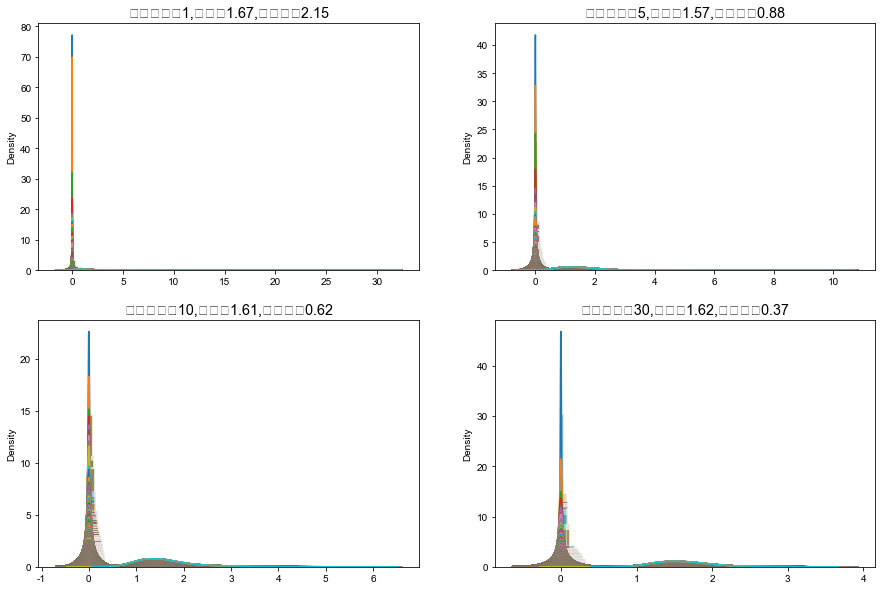

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from time import time

def plot_dist(all_):
    """从总体中进行抽样，并绘制每次抽样的分布
    Parameters
    ---------------------
    all_:array-like
        用来模拟总体数据。
    """
    # 计算总体的均值与方差
    print(f"总体均值：{all_.mean():.2f},总体标准差：{all_.std():.2f}")
    
    # 定义样本容量列表，每次抽取几个数，由此样本容量决定
    sample_num = [1,5,10,30]
    
    # 计算各样本容量下的标准误差
    print(all_.std()/np.sqrt(sample_num))
    
    # 定义子图
    fig,ax =plt.subplots(2,2)
    
    # 设置画布大小
    fig.set_size_inches(15,10)
    
    # 将ax转换成一维数组，便于后面循环用
    ax = ax.ravel()
    
    # 设置seaborn绘图的样式与字体规模
    sns.set(style="darkgrid",font_scale=1.2)
    # 设置中文字体
    plt.rcParams["font.family"]="SimHei"
    plt.rcParams["axes.unicode_minus"]=False
    
    for index,num in enumerate(sample_num):
        # 创建一个均值数组，用来存放每次抽样的均值
        mean_arr = np.zeros(1000)
        # 循环1000，每次取数在sample_num个，获取1000个样本
        for i in range(len(mean_arr)):
            # 进行随机抽样，计算每个样本的均值并放入数组中
            # size：样本容量
            mean_arr[i] = np.random.choice(all_,size=num).mean() # 先取样，计算均值后存入mean_arr中
            ax[index].set_title(f"样本容量：{num},均值：{mean_arr.mean():.2f},标准差：{mean_arr.std():.2f}")
            warnings.filterwarnings("ignore")
            sns.distplot(mean_arr,ax=ax[index])
            
all_ = np.random.lognormal(size=10000)
start = time()
plot_dist(all_)
end = time()
print(f"Running Time: {end-start}")

总体的均值： 9821
一次抽样的样本均值： 9823.420255625386
置信区间􀀂95%置信度􀀃： (9809.56096271413, 9837.279548536642)


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20307 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26679 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26412 missing from c

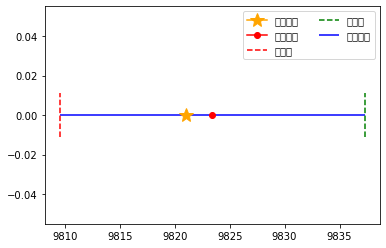

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from time import time

# 使用随机数生成总体均值，其值未知。
mean = np.random.randint(-10000, 10000)
# 定义总体标准差。
std = 50
# 定义样本容量。
n = 50
# 随机生成总体数据。
all_ = np.random.normal(loc=mean, scale=std, size=10000)
# 从总体中抽取若􀀁个体，构成一个样本。
sample = np.random.choice(all_, size=n)
sample_mean = sample.mean()
print("总体的均值：", mean)
print("一次抽样的样本均值：", sample_mean)
plt.plot(mean, 0, marker="*", color="orange", ms=15, label="总体均值") 
plt.plot(sample_mean, 0, marker="o", color="r", label="样本均值")
# 计算标准误差。
se = std / np.sqrt(n)
# 根据标准误差，计算置信区间。
min_ = sample_mean - 1.96 * se
max_ = sample_mean + 1.96 * se
print("置信区间􀀂95%置信度􀀃：", (min_, max_))
# 绘制置信区间与边界。
# 绘制水􀀄线。
plt.hlines(0, xmin=min_, xmax=max_, colors="b", label="置信区间")
# 绘制垂直线。
plt.axvline(min_, 0.4, 0.6, color="r", ls="--", label="左边界")
plt.axvline(max_, 0.4, 0.6, color="g", ls="--", label="右边界")
plt.legend(ncol=2)